<h1 style="color: Green; font-family: Times Roman; font-weight: bold;text-align:center"> Analyzing Trends in Respiratory Illness </h2>

# Introduction

Understanding respiratory illnesses like influenza, COVID-19, and RSV is crucial for public health. This project will analyze a dataset from the Illinois Department of Public Health (IDPH), which includes weekly data on emergency department visits and hospital admissions for respiratory conditions.

We will explore how different factors, such as age and race/ethnicity, affect the number of visits related to these illnesses. By using machine learning techniques, we aim to identify trends and make predictions about future cases.

Our analysis will include various methods to find patterns in the data, helping healthcare providers and public health officials better respond to respiratory illness outbreaks. This project seeks to provide valuable insights that can improve health outcomes and resource management during peak illness seasons.

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Import Dataset

In [4]:
df = pd.read_csv("Visits_for_Respiratory_Illnesses.csv")

# Data Preprocessing

### EDA

In [5]:
df.head()

,mmwr_week,week,week_start,week_end,season,data_source,essence_category,respiratory_category,visit_type,demographic_category,demographic_group,percent,current_week_ending
0,202043,43,10/18/2020,10/24/2020,2020-2021,ESSENCE,CDC Influenza DD v1,Influenza,Admissions,Age Group,65+,0.05,10/26/2024
1,202032,32,08/02/2020,08/08/2020,2019-2020,ESSENCE,CDC Respiratory Syncytial Virus DD v1,RSV,Admissions,Race/Ethnicity,Asian Non-Hispanic,0.00,08/09/2025
2,202439,39,09/22/2024,09/28/2024,2023-2024,ESSENCE,CDC Broad Acute Respiratory DD v1,Broad Acute Respiratory,Admissions,Age Group,65+,16.59,09/27/2025
3,202406,6,02/04/2024,02/10/2024,2023-2024,ESSENCE,CDC Influenza DD v1,Influenza,ED Visits,Age Group,45_64,0.99,02/08/2025
4,202429,29,07/14/2024,07/20/2024,2023-2024,ESSENCE,CDC Respiratory Syncytial Virus DD v1,RSV,Admissions,Age Group,Age Unknown,0.00,07/19/2025


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48181 entries, 0 to 48180
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mmwr_week             48181 non-null  int64  
 1   week                  48181 non-null  int64  
 2   week_start            48181 non-null  object 
 3   week_end              48181 non-null  object 
 4   season                48181 non-null  object 
 5   data_source           48181 non-null  object 
 6   essence_category      48181 non-null  object 
 7   respiratory_category  48181 non-null  object 
 8   visit_type            48181 non-null  object 
 9   demographic_category  48181 non-null  object 
 10  demographic_group     48181 non-null  object 
 11  percent               47964 non-null  float64
 12  current_week_ending   48181 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 4.8+ MB


In [7]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
mmwr_week,48181.0,202075.24,247.06,201540.0,201914.0,202115.00,202303.00,202442.0
week,48181.0,26.62,15.00,1.0,14.0,27.00,40.00,52.0
percent,47964.0,3.31,6.33,0.0,0.0,0.48,3.34,100.0


In [8]:
df.columns

Index(['mmwr_week', 'week', 'week_start', 'week_end', 'season', 'data_source',
       'essence_category', 'respiratory_category', 'visit_type',
       'demographic_category', 'demographic_group', 'percent',
       'current_week_ending'],
      dtype='object')

In [9]:
df.shape

(48181, 13)

### Handle Missing Data

In [7]:
df.isnull().sum()

mmwr_week                 0
week                      0
week_start                0
week_end                  0
season                    0
data_source               0
essence_category          0
respiratory_category      0
visit_type                0
demographic_category      0
demographic_group         0
percent                 217
current_week_ending       0
dtype: int64

Missing values qare present in only one column, 'percent' which is the target column. Let's replace null values with the mean of the column

In [10]:
df['percent'] = df['percent'].fillna(df['percent'].mean())

In [12]:
df.duplicated().sum()

0

### Compare Illness by Category

In [18]:
# Group by Respiratory Category and mean percentage of visits

respiratory_category_stats = df.groupby('respiratory_category')['percent'].mean().reset_index()
print(respiratory_category_stats)

      respiratory_category    percent
0  Broad Acute Respiratory  12.440211
1                 COVID-19   1.774713
2                      ILI   1.578689
3                Influenza   0.606950
4                      RSV   0.221328


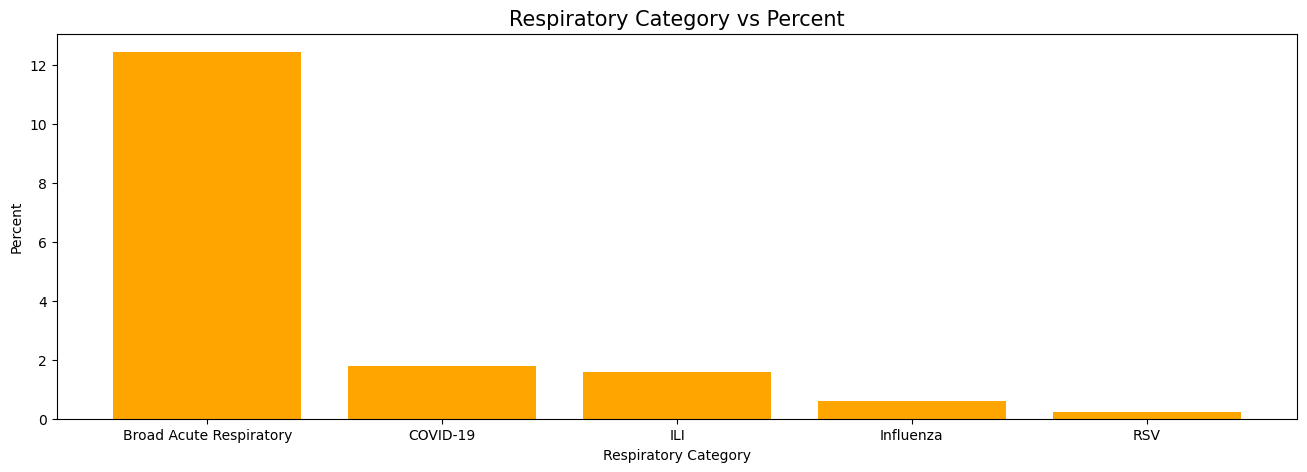

In [31]:
x = respiratory_category_stats['respiratory_category']
y = respiratory_category_stats['percent']
plt.figure(figsize = (16,5))
plt.bar(x,y,color='orange')
plt.xlabel('Respiratory Category')
plt.ylabel('Percent')
plt.title('Respiratory Category vs Percent', fontsize=15)
plt.show()

In [23]:
# Group by Demograhic Group and mean percentage of visits

demographic_group_stats = df.groupby('demographic_group')['percent'].mean().reset_index()
print(demographic_group_stats)

         demographic_group   percent
0                    00_04  6.016131
1                    05_17  4.325106
2                    18_44  2.098747
3                    45_64  3.003161
4                      65+  3.682120
5                      ALL  3.157790
6              Age Unknown  1.262863
7       Asian Non-Hispanic  3.444523
8       Black Non-Hispanic  3.410858
9       Hispanic or Latino  3.743733
10    Other Race/Ethnicity  3.408477
11  Unknown Race/Ethnicity  2.563324
12      White Non-Hispanic  2.897428


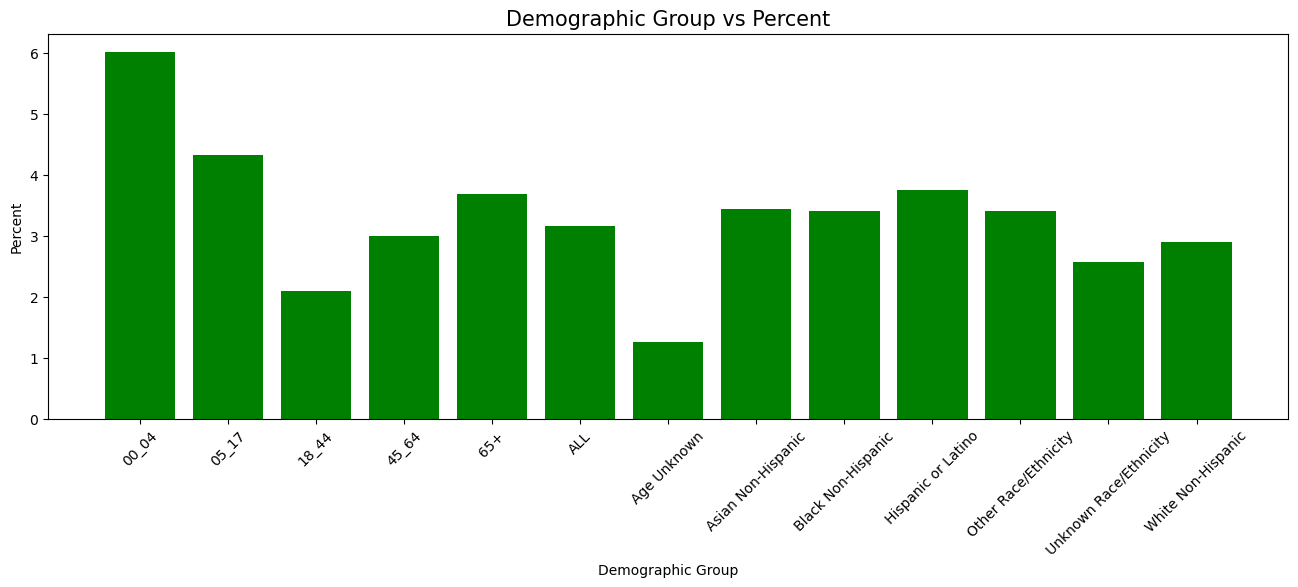

In [32]:
x = demographic_group_stats['demographic_group']
y = demographic_group_stats['percent']
plt.figure(figsize = (16,5))
plt.bar(x,y,color="green")
plt.xlabel('Demographic Group')
plt.ylabel('Percent')
plt.xticks(rotation=45)
plt.title('Demographic Group vs Percent', fontsize=15)
plt.show()

In [26]:
# Group by Season and mean percentage of visits

season_stats = df.groupby('season')['percent'].mean().reset_index()
print(season_stats)

      season   percent
0  2015-2016  1.954309
1  2016-2017  2.599125
2  2017-2018  3.313650
3  2018-2019  2.954014
4  2019-2020  4.130680
5  2020-2021  3.263700
6  2021-2022  3.605940
7  2022-2023  3.388238
8  2023-2024  3.407993
9  2024-2025  2.497557


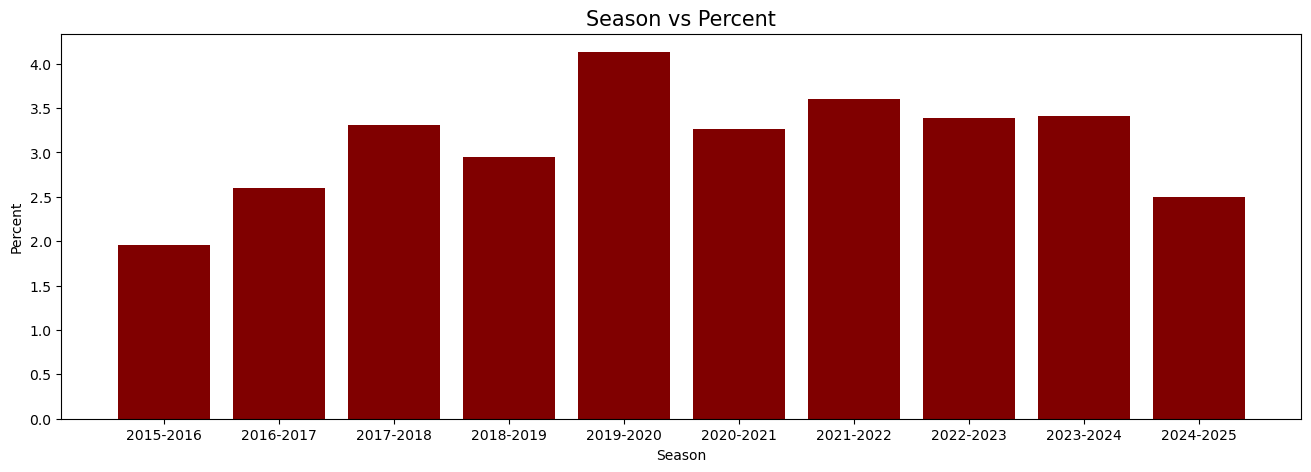

In [34]:
x = season_stats['season']
y = season_stats['percent']
plt.figure(figsize = (16,5))
plt.bar(x,y,color="maroon")
plt.xlabel('Season')
plt.ylabel('Percent')
plt.title('Season vs Percent', fontsize=15)
plt.show()

### Multivariate Analysis

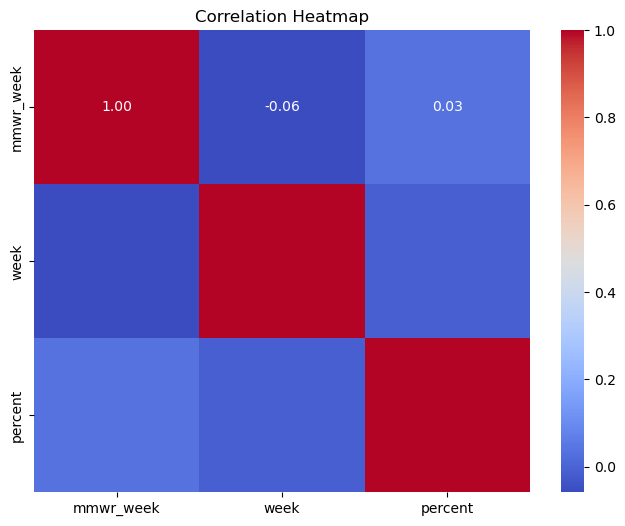

In [13]:
corr_matrix = df[['mmwr_week', 'week', 'percent']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Outlier Detection

Outliers are data points that differ significantly from other observations in a dataset. They are extreme values that lie far away from the overall pattern or distribution of the data. Outliers can result from variability in the data, measurement errors, or rare but valid occurrences.

### Skewness Checking

Skewness refers to the asymmetry or deviation from symmetry in the distribution of data. A distribution is considered skewed if it is not symmetrical and has a longer or fatter tail on one side. Understanding skewness is important because it gives insights into the shape of the data distribution, which affects statistical analysis and the choice of appropriate models.

In [39]:
num_cols = df.select_dtypes(include=['float64','int64'])
num_cols.skew()

mmwr_week   -0.397348
week        -0.016217
percent      3.743531
dtype: float64

In [40]:
df_new = df.copy()

In [41]:
df_new['percent'] = np.log1p(df_new['percent'])
df_new['percent'].skew()

1.0182861622558135

In [42]:
df_new['percent'] = np.sqrt(df_new['percent'])
df_new['percent'].skew()

0.31903484914004904

In [43]:
df['percent'] = df_new['percent']

### Z-Score Calculation

The **Z-score** method is a statistical technique for identifying outliers in a dataset. It measures how far a data point deviates from the mean of the data in terms of standard deviations. Points with Z-scores that exceed a defined threshold are considered potential outliers. The Z-score for a data point is calculated using the formula:

**𝑍 = (X-μ)/σ**

The Z-score measures how many standard deviations x is away from the mean:

Z-score of 0 means the data point is exactly at the mean.

Z-score of +1 means the data point is one standard deviation above the mean.

Z-score of -1 means the data point is one standard deviation below the mean.

In [45]:
from scipy.stats import zscore

In [60]:
z_threshold = 3

for col in num_cols:
    z_scores = zscore(df[col])
    
    outliers = np.abs(z_scores) > z_threshold
    
    if outliers.any(): 
        df[col] = np.where(outliers, df[col].mean(), df[col])
    print(f"Column: {col} - Outliers Imputed: {outliers.sum()} - Skewness: {df[col].skew()}")

Column: mmwr_week - Outliers Imputed: 0 - Skewness: -0.39734778162366785
Column: week - Outliers Imputed: 0 - Skewness: -0.016217148490051923
Column: percent - Outliers Imputed: 0 - Skewness: 0.31903484914004904


<Axes: >

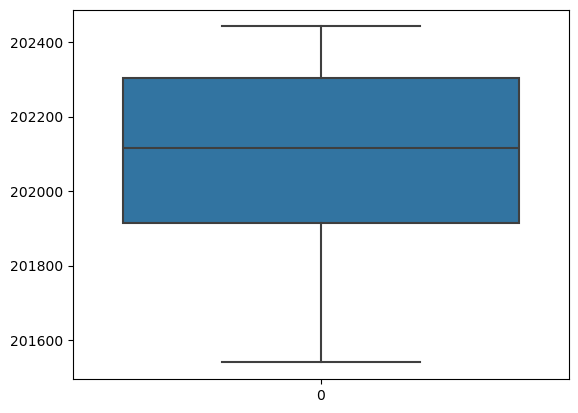

In [64]:
sns.boxplot(df['mmwr_week'])

<Axes: >

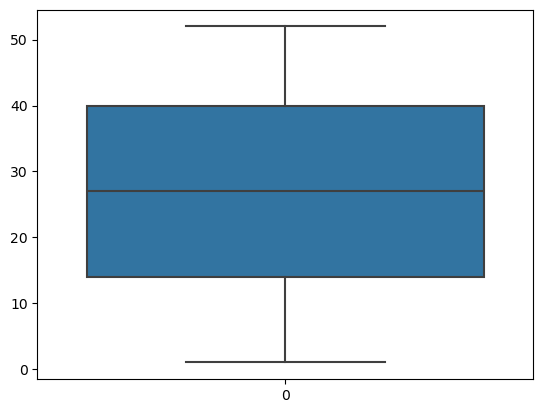

In [65]:
sns.boxplot(df['week'])

<Axes: >

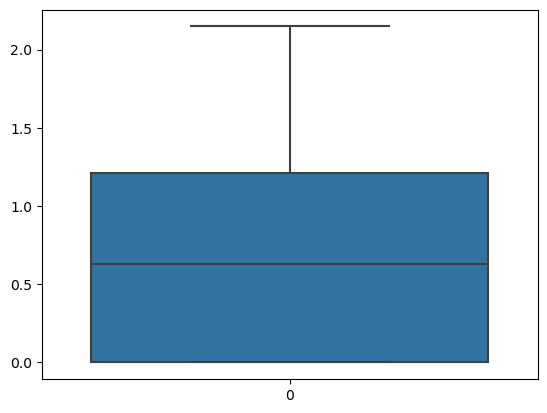

In [66]:
sns.boxplot(df['percent'])

# Data Transformation

Dataset consist of several columns of data type 'object'. We have to convertit into numerical type inorder to apply machine learning algorithm. So let's apply One Hot Encoding

NB: Exclude columns consisting of date information

### One Hot Encoding

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48181 entries, 0 to 48180
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mmwr_week             48181 non-null  int64  
 1   week                  48181 non-null  int64  
 2   week_start            48181 non-null  object 
 3   week_end              48181 non-null  object 
 4   season                48181 non-null  object 
 5   data_source           48181 non-null  object 
 6   essence_category      48181 non-null  object 
 7   respiratory_category  48181 non-null  object 
 8   visit_type            48181 non-null  object 
 9   demographic_category  48181 non-null  object 
 10  demographic_group     48181 non-null  object 
 11  percent               48181 non-null  float64
 12  current_week_ending   48181 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 4.8+ MB


In [68]:
categorical_columns = ['season', 'data_source', 'essence_category', 'respiratory_category', 'visit_type', 'demographic_category', 'demographic_group']
df_encoded = pd.get_dummies(df, columns = categorical_columns, drop_first=True)

In [70]:
df_encoded.dtypes

mmwr_week                                                   int64
week                                                        int64
week_start                                                 object
week_end                                                   object
percent                                                   float64
current_week_ending                                        object
season_2016-2017                                             bool
season_2017-2018                                             bool
season_2018-2019                                             bool
season_2019-2020                                             bool
season_2020-2021                                             bool
season_2021-2022                                             bool
season_2022-2023                                             bool
season_2023-2024                                             bool
season_2024-2025                                             bool
data_sourc

### Convert date columns to datetime

Convert the datatype of columns into datetime type

In [71]:
df_encoded['week_start'] = pd.to_datetime(df_encoded['week_start'], format='%m/%d/%Y')
df_encoded['week_end'] = pd.to_datetime(df_encoded['week_end'], format='%m/%d/%Y')
df_encoded['current_week_ending'] = pd.to_datetime(df_encoded['current_week_ending'], format='%m/%d/%Y')

### Extract Date Components

Extract the date components (year, month, day, weekday) from date columns so that mentioned columns become numeric

In [73]:
df_encoded['week_start_year'] = df_encoded['week_start'].dt.year
df_encoded['week_start_month'] = df_encoded['week_start'].dt.month
df_encoded['week_start_day'] = df_encoded['week_start'].dt.day
df_encoded['week_start_weekday'] = df_encoded['week_start'].dt.weekday

df_encoded['week_end_year'] = df_encoded['week_end'].dt.year
df_encoded['week_end_month'] = df_encoded['week_end'].dt.month
df_encoded['week_end_day'] = df_encoded['week_end'].dt.day
df_encoded['week_end_weekday'] = df_encoded['week_end'].dt.weekday


df_encoded['current_week_ending_year'] = df_encoded['week_start'].dt.year
df_encoded['current_week_ending_month'] = df_encoded['week_start'].dt.month
df_encoded['current_week_ending_day'] = df_encoded['week_start'].dt.day
df_encoded['current_week_ending-_weekday'] = df_encoded['week_start'].dt.weekday

df_encoded = df_encoded.drop(columns=['week_start', 'week_end', 'current_week_ending'])

In [74]:
df = df_encoded.copy()

# Splitting Dataset

In machine learning, one of the crucial steps in building a model is to split the dataset into two parts: features (independent variables) and the target (dependent variable). This division helps the model learn patterns in the data by using the features to predict the target variable.

In [75]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['percent'], axis=1)
y = df['percent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(38544, 49) (38544,) (9637, 49) (9637,)


# Standardizing Features

Standardization is a technique used to transform features in a dataset so that they have a mean of 0 and a standard deviation of 1. This process is essential for machine learning algorithms that rely on the distance between data points or assume that the data is normally distributed. It ensures that all features contribute equally to the model, regardless of their original scale or units.

### Standard Scaler

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Model Implementation

Let's impement Random Forest Regressor which is an ensemble regression technique to train models

**Random Forest Regressor**
Random Forest Regressor is an ensemble learning method that builds multiple decision trees and combines their outputs to improve prediction accuracy. It is based on the bagging technique, where each tree is trained on a random subset of the data.

Random forests create multiple decision trees by randomly sampling subsets of data and features. Each tree is trained independently, and their predictions are averaged (for regression tasks) to make the final prediction.

It helps mitigate the overfitting problem of individual decision trees by averaging over many trees.

In [85]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled,y_train)


RandomForestRegressor(random_state=42)

In [86]:
y_pred = model.predict(X_test_scaled)

In [87]:
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Model Performance")
print(f"MSE : {mse}, MAE : {mae}, R2_Score : {r2}")

Model Performance
MSE : 0.02822884821971417, MAE : 0.08942229863836015, R2_Score : 0.9236839506865873


# Feature Importance

Feature importance is a technique used to determine the contribution of each feature in a dataset to the predictive power of a machine learning model. Gradient Boosting is a powerful method for feature importance analysis because it builds predictive models iteratively while prioritizing the features that contribute most to reducing prediction errors.

                                              Feature  Importance
0                                           mmwr_week    0.170208
18                           respiratory_category_ILI    0.141640
30                      demographic_group_Age Unknown    0.110484
14  essence_category_CDC Respiratory Syncytial Vir...    0.084291
19                     respiratory_category_Influenza    0.069232
20                           respiratory_category_RSV    0.066456
13               essence_category_CDC Influenza DD v1    0.063582
17                      respiratory_category_COVID-19    0.049475
12          essence_category_CDC COVID-Specific DD v1    0.047520
1                                                week    0.042237


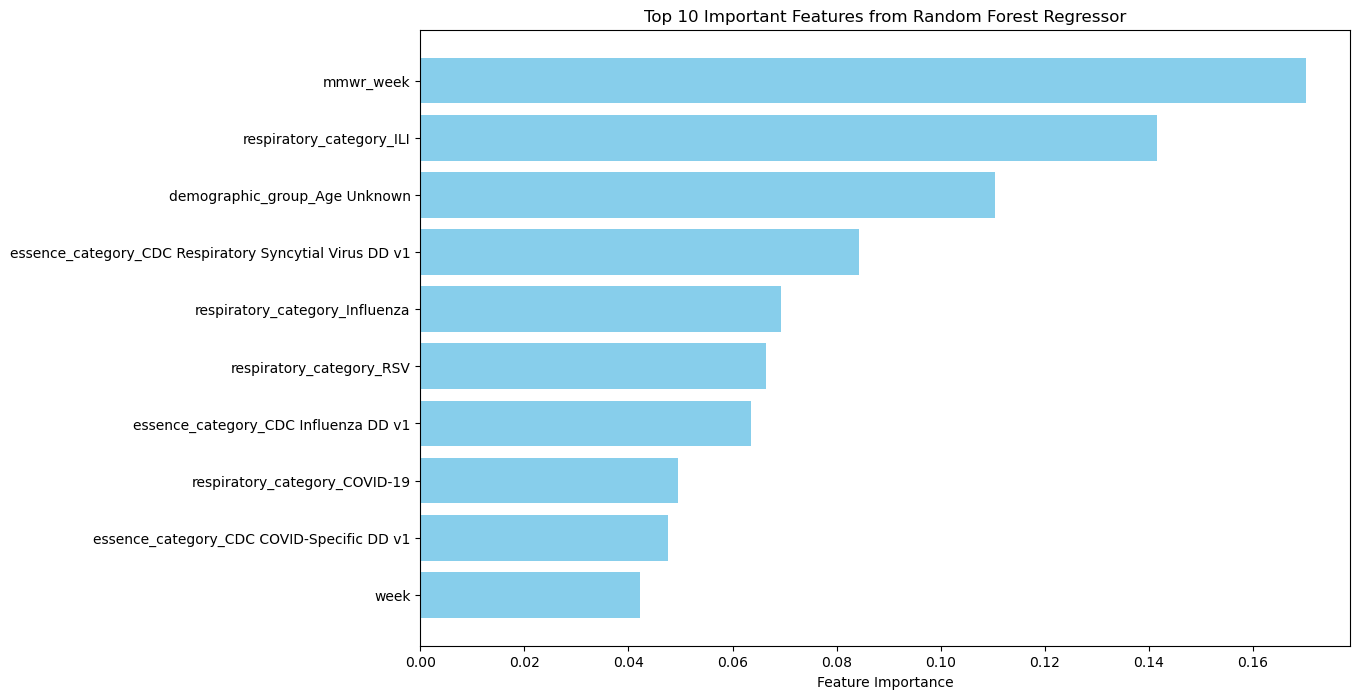

In [88]:
feature_importance = model.feature_importances_

# Create a DataFrame to map feature importance with feature names
import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print(feature_importance_df.head(10))

# Plotting the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features from Random Forest Regressor')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

# Training and Testing Performance Comparison

In [90]:
# Function to check overfitting
def check_overfitting(model, X_train, y_train, X_test, y_test):
    # Predict on training data
    y_train_pred = model.predict(X_train)
    
    # Predict on test data
    y_test_pred = model.predict(X_test)
    
    # Evaluate on training data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    
    # Evaluate on test data
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Print results
    print(f"Training Performance:")
    print(f"MSE: {mse_train}, MAE: {mae_train}, R²: {r2_train}")
    print(f"Test Performance:")
    print(f"MSE: {mse_test}, MAE: {mae_test}, R²: {r2_test}")
    
    # Compare training and test performance
    print("\nDifference between training and test performance:")
    print(f"MSE Difference: {mse_train - mse_test}")
    print(f"MAE Difference: {mae_train - mae_test}")
    print(f"R² Difference: {r2_train - r2_test}")

# Check for overfitting on the best model (e.g., Random Forest Regressor)
check_overfitting(model, X_train_scaled, y_train, X_test_scaled, y_test)

Training Performance:
MSE: 0.004270620654546043, MAE: 0.03432038389911181, R²: 0.9884829142707161
Test Performance:
MSE: 0.02822884821971417, MAE: 0.08942229863836015, R²: 0.9236839506865873

Difference between training and test performance:
MSE Difference: -0.023958227565168126
MAE Difference: -0.055101914739248345
R² Difference: 0.06479896358412884


# Conclusion

This project focused on predicting the percentage of visits (percent) using various machine learning regression models. After preprocessing the data, which involved one-hot encoding categorical variables and scaling numerical features, different regression models were implemented and evaluated. The Random Forest Regressor emerged as the top-performing model with the best accuracy (R² = 93.97%) and the lowest error metrics (MSE = 0.0223, MAE = 0.0815). It demonstrated strong generalization, with minimal overfitting observed. In comparison, the Decision Tree Regressor and Gradient Boosting Regressor also showed solid performance, while Linear Regression underperformed. The key takeaway is that the Random Forest Regressor offers the most reliable predictions for this dataset.